# 📊 Análise de Auxílios Previdenciários - Novembro 2025

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Leitura do dataset tratado
auxilios = pd.read_csv('dados/dados_limpos.csv')
auxilios.head()

,Unnamed: 0,Tipos de auxilio,CID,Despacho,Data nasc,Sexo,Clientela,Vínculo dependentes,Forma Filiação,UF,Quant salarios minimos na RMI,Ramo Atividade,Pensão Alimenticia,Grau Instrução,Qt Anos Contribuição,Data DIB,Data DDB,Data DCB
0,0,Auxílio Doenca Previdenciário,D25.1 Leiomioma Intramural do Utero,Concessao com Analise Documental,1984-07-04,Feminino,Urbano,Não Informado,Empregado,Alagoas,1.50,Comerciario,Sem Pensâo Alimentícia,Não Informado,9,2025-10-11,2025-11-01,2025-10-25
1,1,Auxílio Doenca por Acidente do Trabalho,F33.1 Transt Depress Recorr Episodio Atual Mo,Concessao com Analise Documental,1990-09-01,Feminino,Urbano,Não Informado,Empregado,Alagoas,2.06,Comerciario,Sem Pensâo Alimentícia,Não Informado,11,2025-10-31,2025-11-01,2025-12-29
2,2,Auxílio Doenca Previdenciário,M23 Transt Internos dos Joelhos,Concessao com Analise Documental,1987-12-29,Feminino,Urbano,Não Informado,Empregado,Alagoas,1.00,Comerciario,Sem Pensâo Alimentícia,Não Informado,0,2025-10-30,2025-11-01,2025-12-13
3,3,Auxílio Doenca Previdenciário,S92 Frat do Pe,Concessao com Analise Documental,1987-05-05,Feminino,Urbano,Não Informado,Empregado,Alagoas,1.46,Comerciario,Sem Pensâo Alimentícia,Não Informado,11,2025-10-22,2025-11-01,2025-12-19
4,4,Auxílio Doenca Previdenciário,M51.1 Transt Disco Lombar Outr Intervert Radi,Concessao com Analise Documental,1991-03-08,Masculino,Urbano,Não Informado,Desempregado,Alagoas,1.00,Comerciario,Sem Pensâo Alimentícia,Não Informado,2,2025-10-23,2025-11-01,2025-12-21


In [4]:
#Lê o dataset de dados populacional tratado
populacao = pd.read_csv('dados/dados_populacional_limpo.csv')
populacao.head()

,Unnamed: 0,Unidade da Federação,População_residente
0,0,Rondônia,1751950
1,1,Acre,884372
2,2,Amazonas,4321616
3,3,Roraima,738772
4,4,Pará,8711196


## Plotagens - Pietra

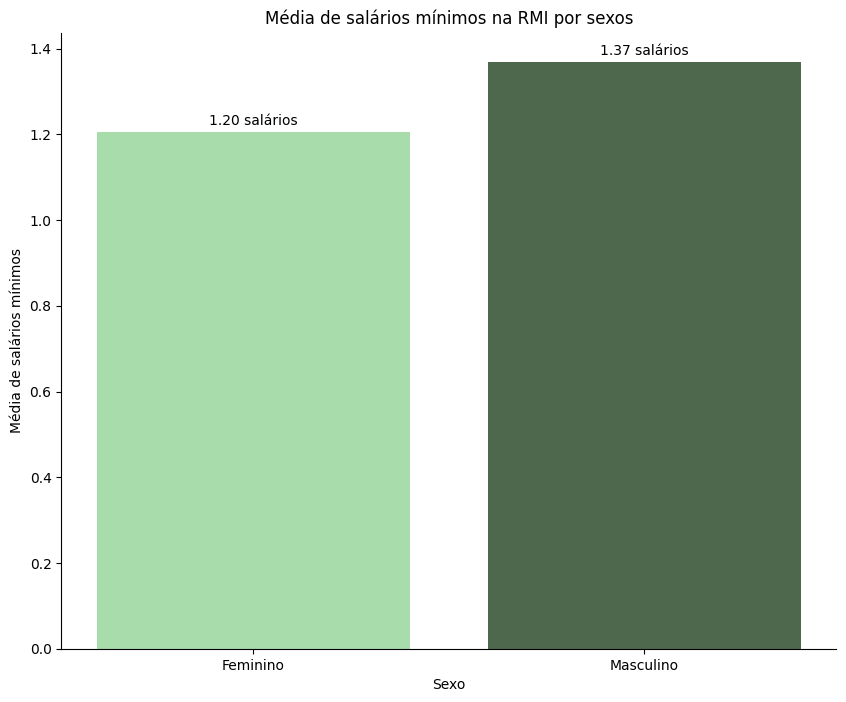

In [5]:
#pega a linha onde sexo = feminino e depois pega a quant de salarios dessas linhas
media_fem = auxilios.loc[auxilios['Sexo'] == 'Feminino', 'Quant salarios minimos na RMI'].mean()
media_masc = auxilios.loc[auxilios['Sexo'] == 'Masculino', 'Quant salarios minimos na RMI'].mean()

diferenca = abs(media_fem - media_masc)

fig, ax = plt.subplots(figsize=(10, 8))

barras = ax.bar(['Feminino', 'Masculino'],
    [media_fem, media_masc],
    color=['#A8DCAB', '#4E684E']
)

ax.set_title('Média de salários mínimos na RMI por sexos')
ax.set_xlabel('Sexo')
ax.set_ylabel('Média de salários mínimos')
ax.bar_label(barras, fmt='%.2f salários', padding=3)

ax.spines['top'].set_visible(False) #borda
ax.spines['right'].set_visible(False) 

plt.show()


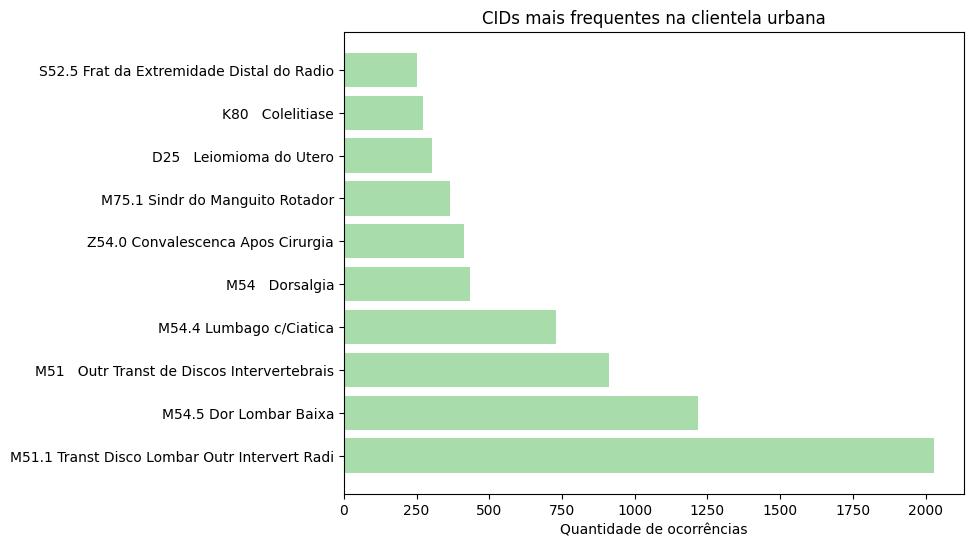

In [6]:
#filtrando e tirando os cid 'vazios'
cli_urbana = auxilios.loc[auxilios['Clientela'] == 'Rural', 'CID']
cli_urbana = cli_urbana[~cli_urbana.isin(['Zerados', 'Em Branco', '{ñ class}'])] #mantem somente os CIDs que nao estao nessa condição

contagem = cli_urbana.value_counts().head(10)
plt.figure(figsize=(8,6))
plt.barh(contagem.index,
        contagem.values,
        color='#A8DCAB'
        )
plt.title('CIDs mais frequentes na clientela urbana')
plt.xlabel('Quantidade de ocorrências')

plt.show()


In [7]:
proporcao = (auxilios.groupby('UF')['Forma Filiação'] #agrupa por uf, pega a coluna forma filiação
                        .value_counts(normalize=True) #normaliza para retornar as proporções
                        .unstack(fill_value=0) #Antes retornava uma Series, que tem indice multinivel, as linhas eram combinações de UF e de Forma de Filiação, e agora é um DataFrame, com as linhas sendo os uf e as colunas as formas de filiação. E coloca 0 
                        ) 
proporcao

Forma Filiação,Autônomo,Desempregado,Doméstico,Empregado,Empresário,Equiparado a Autônomo,Facultativo,Optante Pela Lei 6.184/74,Segurado Especial,Trabalhador Avulso
UF,,,,,,,,,,
Acre,0.105061,0.203520,0.018152,0.449945,0.000000,0.000000,0.020902,0.000550,0.201870,0.000000
Alagoas,0.207575,0.242546,0.021595,0.284126,0.000000,0.000000,0.057373,0.000645,0.185012,0.001128
Amapá,0.059161,0.199885,0.013211,0.304997,0.000000,0.000000,0.018380,0.000000,0.403791,0.000574
Amazonas,0.082340,0.221946,0.013694,0.267829,0.000178,0.000000,0.021519,0.000000,0.391962,0.000534
Bahia,0.135217,0.199045,0.016023,0.226582,0.000080,0.000000,0.048839,0.000106,0.373790,0.000318
Ceará,0.148723,0.262336,0.014481,0.233821,0.000198,0.000000,0.050632,0.000099,0.289164,0.000545
Distrito Federal,0.297753,0.190698,0.032075,0.153216,0.000070,0.000000,0.120459,0.000000,0.205397,0.000332
Espírito Santo,0.228418,0.225097,0.025761,0.373254,0.000343,0.000000,0.033776,0.000000,0.110946,0.002404
Goiás,0.217196,0.216929,0.026564,0.366143,0.000000,0.000000,0.029307,0.000000,0.143125,0.000736


In [8]:
coordenadas_uf = {
    'Acre': [-9.0238, -70.812],   'Alagoas': [-9.5713, -36.782],
    'Amapá': [0.9020, -52.003],    'Amazonas': [-3.4168, -65.8561],
    'Bahia': [-12.5797, -41.7007], 'Ceará': [-5.4984, -39.3206],
    'Distrito Federal': [-15.7801, -47.9292], 'Espírito Santo': [-19.1834, -40.3089],
    'Goiás': [-15.8270, -49.8362], 'Maranhão': [-4.9609, -45.2744],
    'Mato Grosso': [-12.6819, -56.9211], 'Mato Grosso do Sul': [-20.7722, -54.7852],
    'Minas Gerais': [-18.5122, -44.555],  'Pará': [-1.9981, -54.9306],
    'Paraíba': [-7.2399, -36.782],   'Paraná': [-24.89, -51.55],
    'Pernambuco': [-8.8137, -36.9541],  'Piauí': [-6.6695, -42.28],
    'Rio de Janeiro': [-22.9099, -43.2095], 'Rio Grande do Norte': [-5.4026, -36.9541],
    'Rio Grande do Sul': [-30.0346, -51.2177], 'Rondônia': [-10.83, -63.34],
    'Roraima': [2.7376, -62.0751],   'Santa Catarina': [-27.2423, -50.2189],
    'Sergipe': [-10.5741, -37.3857], 'São Paulo': [-23.5505, -46.6333],
    'Tocantins': [-10.1753, -48.2982]
}


In [9]:
cores_filiacao = {
    'Autônomo': '#E74C3C',           # Vermelho vibrante
    'Desempregado': '#3498DB',       # Azul royal
    'Doméstico': '#1ABC9C',          # Verde turquesa
    'Empregado': '#673AB7',          # Roxo escuro 
    'Empresário': '#F39C12',         # Laranja forte
    'Equiparado a Autônomo': '#95A5A6',  # Cinza médio
    'Facultativo': '#E91E63',        # Rosa pink
    'Optante Pela Lei 6.184/74': '#9B59B6',  # Roxo 
    'Segurado Especial': '#FF9800',  # Laranja âmbar
    'Trabalhador Avulso': '#2ECC71'  # Verde esmeralda 
}

In [10]:
import io #para usar streams de dados na memória (sem precisar salvar arquivos no disco)
import base64 #para codificar dados binários (como imagens) em texto

def criar_grafico_pizza(valores, labels): #valores = proporções ----- labels = categorias
    cores = [cores_filiacao.get(label, '#CCCCCC') for label in labels]
    
    fig, ax = plt.subplots(figsize=(2, 2))
    ax.pie(valores, labels=None, startangle=90, colors=cores)
    ax.axis('equal') #circulo e nao oval
    
    buffer = io.BytesIO() #maquina virtual, não salva no disco, só na memória temporária

    plt.savefig(buffer, format='png', bbox_inches='tight', transparent=True) #bbox_inches='tight' -> remove espaços em branco ao redor do gráfico
    buffer.seek(0) #rebobina buffer para o inicio
    plt.close(fig)
    
    imagem_base64 = base64.b64encode(buffer.read()).decode() #o buffer le as dados binarios da imagem, converte em texto e transforma de byte para string
    return f'data:image/png;base64,{imagem_base64}' #retorna a string formatada e cola a strind da imagem


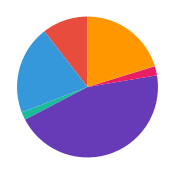
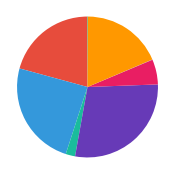
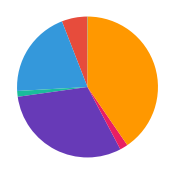
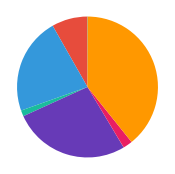
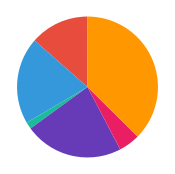
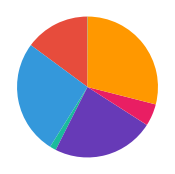
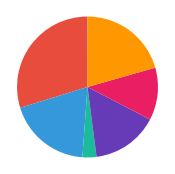
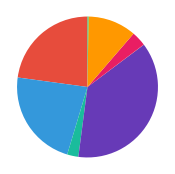
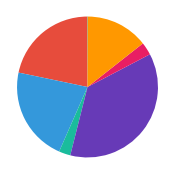
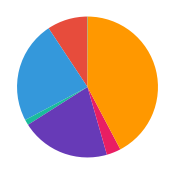
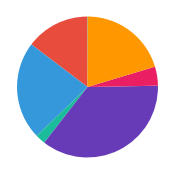
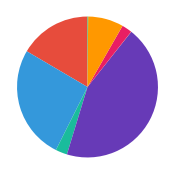
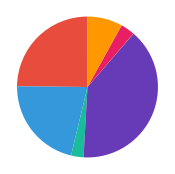
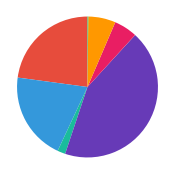
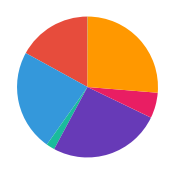
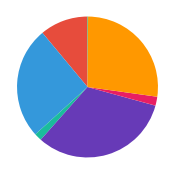
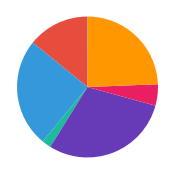
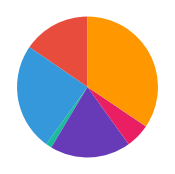
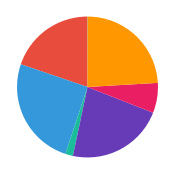
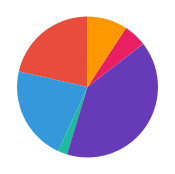
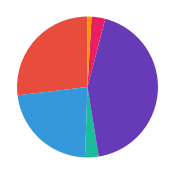
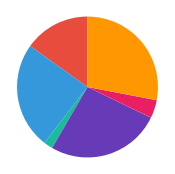
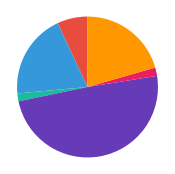
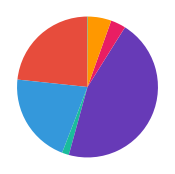
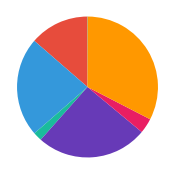
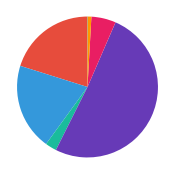
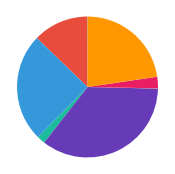

In [11]:
import folium #biblioteca de mapa interativo

mapa = folium.Map(
    location=[-15.7801, -47.9292],
    zoom_start=4,
    tiles='OpenStreetMap'
)

for uf_nome in proporcao.index: #percorre cada UF que está no índice do dataframe proporcao
    if uf_nome in coordenadas_uf:
        valores = proporcao.loc[uf_nome] #pega as proporções de cada forma de filiação naquele estado e retorna uma Serie
        valores = valores[valores > 0]
        
        if len(valores) > 0:
            #gera o gráfico
            #values = numeros/proporcoes ----- index = nomes das categotias
            imagem = criar_grafico_pizza(valores.values, valores.index)
            
            #cria tabela do popup
            tabela_html = '<table style="width:100%; font-size:11px;">'

            #legenda do popup
            for label, valor in zip(valores.index, valores.values): #label recebe o nome e valor o numero. O zip junta as duas listas, como se fosse uma tupla(pares) 
                cor = cores_filiacao.get(label, '#CCC')
                tabela_html += f'''
                <tr>
                    <!--faz o quadradinho colorido-->
                    <td><span style="background:{cor}; width:12px; height:12px;
                                     display:inline-block; border:1px solid #000;"></span></td>

                    <!--nome da categoria-->
                    <td>{label}</td>

                    <!--a porcentagem-->
                    <td style="text-align:right;"><b>{valor*100:.1f}%</b></td>
                </tr>
                '''
            tabela_html += '</table>'
            
            #conteudo do popup
            popup_html = f'''
            <!--div que vai agrupar, alinhando no centro e com tamanho minimo-->
            <div style="text-align:center; min-width:250px;">
                <!--titulo com o estado-->
                <h4 style="margin:5px 0;">{uf_nome}</h4>

                <!--grafico de pizza-->
                <img src="{imagem}" width="150" height="150">

                <!--linha horizontal para dividir-->
                <hr style="margin:10px 0;">

                <!--insere conteudo da variavel -> que é a legenda-->
                {tabela_html}
            </div>
            '''

            #adiciona um círculo no mapa
            folium.CircleMarker(
                location=coordenadas_uf[uf_nome],
                radius=5,
                color='#4E684E',
                fill=True,
                fillColor='#A8DCAB',
                fillOpacity=0.6,
                popup=folium.Popup(popup_html, max_width=250)
            ).add_to(mapa)
            
mapa

## Plotagens Sabrina

## SEPARAÇÃO E ORGANIZAÇÃO DE DADOS

In [12]:
#Calcula a duração dos auxilios e adiciona em uma nova coluna no DF auxilios
auxilios['Data DIB'] = pd.to_datetime(auxilios['Data DIB'])
auxilios['Data DCB'] = pd.to_datetime(auxilios['Data DCB'])

auxilios['Duração'] = auxilios['Data DCB'] - auxilios['Data DIB']
auxilios['Duração']

0        14 days
1        59 days
2        44 days
3        58 days
4        59 days
           ...  
580798   29 days
580799   44 days
580800   59 days
580801       NaT
580802   45 days
Name: Duração, Length: 580803, dtype: timedelta64[ns]

In [13]:
#Cria um df com a quantidade de auxilios distibuidos no estado
df_auxilios_por_UF = auxilios['UF'].value_counts().reset_index()
df_auxilios_por_UF.columns = ['UF', 'Total de Auxilios Concedidos']
df_auxilios_por_UF

,UF,Total de Auxilios Concedidos
0,São Paulo,115577
1,Minas Gerais,65987
2,Distrito Federal,57148
3,Rio Grande do Sul,39089
4,Bahia,37695
5,Rio de Janeiro,34372
6,Paraná,32615
7,Santa Catarina,31726
8,Pernambuco,20793
9,Ceará,20165


In [14]:
#cria df com percentual de auxilios concedidos em comparação com a população
comparacao = pd.merge(df_auxilios_por_UF, populacao, left_on='UF',right_on='Unidade da Federação')
comparacao['porcentagem_auxilio'] = ((comparacao['Total de Auxilios Concedidos'] / comparacao['População_residente']) * 100).round(2)
comparacao = comparacao.sort_values('porcentagem_auxilio', ascending=False)
comparacao

,UF,Total de Auxilios Concedidos,Unnamed: 0,Unidade da Federação,População_residente,porcentagem_auxilio
2,Distrito Federal,57148,26,Distrito Federal,2996899,1.91
7,Santa Catarina,31726,21,Santa Catarina,8187029,0.39
3,Rio Grande do Sul,39089,22,Rio Grande do Sul,11233263,0.35
1,Minas Gerais,65987,16,Minas Gerais,21393441,0.31
16,Mato Grosso do Sul,9028,23,Mato Grosso do Sul,2924631,0.31
12,Paraíba,12064,11,Paraíba,4164468,0.29
6,Paraná,32615,20,Paraná,11890517,0.27
15,Piauí,9120,8,Piauí,3384547,0.27
14,Mato Grosso,9834,24,Mato Grosso,3893659,0.25
0,São Paulo,115577,19,São Paulo,46081801,0.25


In [15]:
#Cria df somente com dados de mulheres
df_mulheres = auxilios[auxilios['Sexo'] == 'Feminino']
df_mulheres

,Unnamed: 0,Tipos de auxilio,CID,Despacho,Data nasc,Sexo,Clientela,Vínculo dependentes,Forma Filiação,UF,Quant salarios minimos na RMI,Ramo Atividade,Pensão Alimenticia,Grau Instrução,Qt Anos Contribuição,Data DIB,Data DDB,Data DCB,Duração
0,0,Auxílio Doenca Previdenciário,D25.1 Leiomioma Intramural do Utero,Concessao com Analise Documental,1984-07-04,Feminino,Urbano,Não Informado,Empregado,Alagoas,1.50,Comerciario,Sem Pensâo Alimentícia,Não Informado,9,2025-10-11,2025-11-01,2025-10-25,14 days
1,1,Auxílio Doenca por Acidente do Trabalho,F33.1 Transt Depress Recorr Episodio Atual Mo,Concessao com Analise Documental,1990-09-01,Feminino,Urbano,Não Informado,Empregado,Alagoas,2.06,Comerciario,Sem Pensâo Alimentícia,Não Informado,11,2025-10-31,2025-11-01,2025-12-29,59 days
2,2,Auxílio Doenca Previdenciário,M23 Transt Internos dos Joelhos,Concessao com Analise Documental,1987-12-29,Feminino,Urbano,Não Informado,Empregado,Alagoas,1.00,Comerciario,Sem Pensâo Alimentícia,Não Informado,0,2025-10-30,2025-11-01,2025-12-13,44 days
3,3,Auxílio Doenca Previdenciário,S92 Frat do Pe,Concessao com Analise Documental,1987-05-05,Feminino,Urbano,Não Informado,Empregado,Alagoas,1.46,Comerciario,Sem Pensâo Alimentícia,Não Informado,11,2025-10-22,2025-11-01,2025-12-19,58 days
6,6,Auxílio Doenca Previdenciário,F41 Outr Transt Ansiosos,Concessao com Analise Documental,1972-10-09,Feminino,Urbano,Não Informado,Autônomo,Alagoas,1.00,Comerciario,Sem Pensâo Alimentícia,Não Informado,1,2025-10-24,2025-11-01,2025-12-22,59 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580797,584915,Pensão por Morte Previdenciária,Zerados,Concessao Normal,1967-09-13,Feminino,Rural,Cônjuge,Segurado Especial,Tocantins,1.00,Rural,Sem Pensâo Alimentícia,5ª. a 8ª. Série Incompl. do 1º. Grau (Ginás,0,2025-03-20,2025-11-29,NaT,NaT
580798,584916,Auxílio Doenca Previdenciário,F41.2 Transt Misto Ansioso e Depressivo,Concessao com Analise Documental,1997-10-04,Feminino,Urbano,Não Informado,Desempregado,Tocantins,1.08,Comerciario,Sem Pensâo Alimentícia,Não Informado,2,2025-11-24,2025-11-29,2025-12-23,29 days
580799,584917,Auxílio Doenca Previdenciário,N80 Endometriose,Concessao com Analise Documental,1988-07-24,Feminino,Urbano,Não Informado,Empregado,Tocantins,1.00,Comerciario,Sem Pensâo Alimentícia,Não Informado,6,2025-11-19,2025-11-29,2026-01-02,44 days
580800,584918,Auxílio Doenca Previdenciário,G56.0 Sindr do Tunel do Carpo,Concessao com Analise Documental,1973-11-23,Feminino,Urbano,Não Informado,Autônomo,Tocantins,1.00,Comerciario,Sem Pensâo Alimentícia,Não Informado,11,2025-10-27,2025-11-29,2025-12-25,59 days


In [16]:
#Cria df com total de auxilios conedidos para mulheres por estado
df_mulheres_UF = df_mulheres['UF'].value_counts().reset_index()
df_mulheres_UF.columns = ['UF', 'Total de Auxilios Concedidos']
df_mulheres_UF['Sexo'] = 'Feminino'
df_mulheres_UF

,UF,Total de Auxilios Concedidos,Sexo
0,São Paulo,64110,Feminino
1,Distrito Federal,40601,Feminino
2,Minas Gerais,36572,Feminino
3,Bahia,22165,Feminino
4,Rio Grande do Sul,21924,Feminino
5,Rio de Janeiro,18814,Feminino
6,Santa Catarina,17921,Feminino
7,Paraná,17695,Feminino
8,Pernambuco,11432,Feminino
9,Ceará,11429,Feminino


In [17]:
#Cria df somente com dados de mulheres
df_homens = auxilios[auxilios['Sexo'] == 'Masculino']
df_homens

,Unnamed: 0,Tipos de auxilio,CID,Despacho,Data nasc,Sexo,Clientela,Vínculo dependentes,Forma Filiação,UF,Quant salarios minimos na RMI,Ramo Atividade,Pensão Alimenticia,Grau Instrução,Qt Anos Contribuição,Data DIB,Data DDB,Data DCB,Duração
4,4,Auxílio Doenca Previdenciário,M51.1 Transt Disco Lombar Outr Intervert Radi,Concessao com Analise Documental,1991-03-08,Masculino,Urbano,Não Informado,Desempregado,Alagoas,1.00,Comerciario,Sem Pensâo Alimentícia,Não Informado,2,2025-10-23,2025-11-01,2025-12-21,59 days
5,5,Auxílio Doenca Previdenciário,M19.9 Artrose Ne,Concessao com Analise Documental,1985-10-03,Masculino,Urbano,Não Informado,Empregado,Alagoas,1.39,Comerciario,Sem Pensâo Alimentícia,Não Informado,13,2025-10-25,2025-11-01,2025-12-08,44 days
9,9,Auxílio Doenca Previdenciário,M50.2 Outr Deslocamento de Disco Cervical,Concessao com Analise Documental,1978-04-22,Masculino,Urbano,Não Informado,Desempregado,Alagoas,1.71,Comerciario,Sem Pensâo Alimentícia,Não Informado,18,2025-10-25,2025-11-01,2025-11-21,27 days
11,11,Auxílio Doenca Previdenciário,M25.5 Dor Articular,Concessao com Analise Documental,1992-02-14,Masculino,Urbano,Não Informado,Desempregado,Alagoas,3.46,Comerciario,Sem Pensâo Alimentícia,Não Informado,11,2025-10-23,2025-11-01,2025-11-27,35 days
12,12,Auxílio Doenca Previdenciário,I50 Insuf Cardiaca,Concessao com Analise Documental,1970-10-22,Masculino,Urbano,Não Informado,Empregado,Alagoas,1.22,Comerciario,Sem Pensâo Alimentícia,Não Informado,20,2025-10-12,2025-11-01,2025-12-06,55 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580788,584906,Amp. Social Pessoa Portadora Deficiencia,Zerados,Concessao Decorrente de Acao Judicial,2002-11-26,Masculino,Urbano,Não Informado,Desempregado,Tocantins,1.00,Comerciario,Sem Pensâo Alimentícia,Não Informado,0,2024-08-10,2025-11-29,NaT,NaT
580790,584908,Aposentadoria Invalidez Previdenciária,M54.5 Dor Lombar Baixa,Concessao Normal,1967-10-04,Masculino,Rural,Não Informado,Segurado Especial,Tocantins,1.00,Rural,Sem Pensâo Alimentícia,Não Informado,0,2025-11-27,2025-11-29,NaT,NaT
580792,584910,Aposentadoria Invalidez Previdenciária,C20 Neopl Malig do Reto,Concessao Normal,1985-04-17,Masculino,Urbano,Não Informado,Autônomo,Tocantins,1.00,Comerciario,Sem Pensâo Alimentícia,Não Informado,0,2025-11-27,2025-11-29,NaT,NaT
580794,584912,Auxílio Doenca Previdenciário,S06.9 Traum Intracraniano Ne,Conc. Base Artigo 27 Inciso Ii do Rbps,2001-11-25,Masculino,Urbano,Não Informado,Empregado,Tocantins,1.25,Comerciario,Sem Pensâo Alimentícia,Não Informado,4,2025-10-28,2025-11-30,2026-01-04,68 days


In [18]:
#Cria df com total de auxilios concedidos para homens por estado
#Conta a quantidade de auxilios por estado
df_homens_UF = df_homens['UF'].value_counts().reset_index()
df_homens_UF.columns = ['UF', 'Total de Auxilios Concedidos']
df_homens_UF['Sexo'] = 'Masculino'
df_homens_UF

,UF,Total de Auxilios Concedidos,Sexo
0,São Paulo,51467,Masculino
1,Minas Gerais,29415,Masculino
2,Rio Grande do Sul,17165,Masculino
3,Distrito Federal,16547,Masculino
4,Rio de Janeiro,15558,Masculino
5,Bahia,15530,Masculino
6,Paraná,14920,Masculino
7,Santa Catarina,13805,Masculino
8,Pernambuco,9361,Masculino
9,Ceará,8736,Masculino


In [19]:
#Une os dfs de gênero
df_generos_por_UF = pd.concat([df_homens_UF, df_mulheres_UF])
df_generos_por_UF

,UF,Total de Auxilios Concedidos,Sexo
0,São Paulo,51467,Masculino
1,Minas Gerais,29415,Masculino
2,Rio Grande do Sul,17165,Masculino
3,Distrito Federal,16547,Masculino
4,Rio de Janeiro,15558,Masculino
5,Bahia,15530,Masculino
6,Paraná,14920,Masculino
7,Santa Catarina,13805,Masculino
8,Pernambuco,9361,Masculino
9,Ceará,8736,Masculino


In [20]:
#Cria DF com Tipos de auxilio mais concedidos por estado
tipos_por_UF = auxilios.groupby(['Tipos de auxilio','UF']).size().reset_index(name='Quantidade')
tipos_por_UF = tipos_por_UF.sort_values('Quantidade', ascending=False)
tipos_por_UF

,Tipos de auxilio,UF,Quantidade
286,Auxílio Doenca Previdenciário,São Paulo,78937
273,Auxílio Doenca Previdenciário,Minas Gerais,47888
160,Aposentadoria por Idade,Distrito Federal,27513
280,Auxílio Doenca Previdenciário,Rio Grande do Sul,27229
284,Auxílio Doenca Previdenciário,Santa Catarina,23323
...,...,...,...
405,Pensão por Morte Acidente do Trabalho,Mato Grosso do Sul,1
412,Pensão por Morte Acidente do Trabalho,Sergipe,1
441,Pensão por Morte de Ex-Combatente,Rio Grande do Sul,1
442,Pensão por Morte de Ex-Combatente,Rio de Janeiro,1


In [21]:
#Organiza um df com a média de dias de duração de beneficio por profissão
df_media_profissao = auxilios.groupby('Ramo Atividade')['Duração'].mean().reset_index()
df_media_profissao['Duração'] = df_media_profissao['Duração'].dt.days
df_media_profissao = df_media_profissao.sort_values('Duração', ascending=False)
df_media_profissao

,Ramo Atividade,Duração
0,Bancario,7013.0
5,Maritimo,1879.0
4,Irrelevante,382.0
8,Transportes e Carga,186.0
6,Rural,152.0
7,Servidor Publico,129.0
1,Comerciario,102.0
2,Ferroviario,NaN
3,Industriario,NaN


In [22]:
#Organiza um df com o tipo de auxilio e sua duração
df_media_categoria = auxilios.groupby('Tipos de auxilio')['Duração'].mean().reset_index()
df_media_categoria['Duração'] = df_media_categoria['Duração'].dt.days
df_media_categoria = df_media_categoria.sort_values('Duração', ascending=False)
df_media_categoria

,Tipos de auxilio,Duração
16,Auxílio Suplementar Acidente Trabalho,3924.0
9,Auxílio Acidente,3055.0
2,Aposent. Invalidez Acidente Trabalho,2407.0
4,Aposentadoria Especial,2047.0
10,Auxílio Acidente Previdenciário,1814.0
7,Aposentadoria por Tempo de Contribuição,1433.0
6,Aposentadoria por Idade,990.0
3,Aposent. Tempo de Serviço de Professor,824.0
5,Aposentadoria Invalidez Previdenciária,713.0
14,Auxílio Reclusão,640.0


In [23]:
#Organiza um df com a média de dias de duração de beneficio por genero
df_media_genero = auxilios.groupby('Sexo')['Duração'].mean().reset_index()
df_media_genero['Duração'] = df_media_genero['Duração'].dt.days
df_media_genero = df_media_genero.sort_values('Duração', ascending=False)
df_media_genero

,Sexo,Duração
1,Masculino,110
0,Feminino,108


In [24]:
#Calcula a média de duração dos auxilios
media = auxilios['Duração'].mean()
media = media.days

print(f"Média de duração dos auxilios: {media} dias")

Média de duração dos auxilios: 109 dias


In [25]:
media_duracao_mulheres = df_mulheres['Duração'].mean()
media_duracao_mulheres = media_duracao_mulheres.days

print(f"Média de Duração do Auxilio para o Público Feminino: {media_duracao_mulheres} dias")

Média de Duração do Auxilio para o Público Feminino: 108 dias


In [26]:
media_duracao_homens = df_homens['Duração'].mean()
media_duracao_homens = media_duracao_homens.days

print(f"Média de Duração do Auxilio para o Público Masculino: {media_duracao_homens} dias")

Média de Duração do Auxilio para o Público Masculino: 110 dias


In [27]:
#Junta todas as medias em um df
juncao_medias = pd.DataFrame({
    'Categoria': ['Geral', 'Feminino', 'Masculino'],
    'Média de Duração': [media, media_duracao_mulheres, media_duracao_homens]
})
juncao_medias

,Categoria,Média de Duração
0,Geral,109
1,Feminino,108
2,Masculino,110


In [28]:
#Organiza um df com o total de auxlios por genero
df_total_genero = auxilios.groupby('Sexo').size().reset_index(name='Total de Auxílios')
df_total_genero = df_total_genero.sort_values('Total de Auxílios', ascending=False)
df_total_genero

,Sexo,Total de Auxílios
0,Feminino,332974
1,Masculino,247829


In [29]:
#criando dataframes separados para comparar

graus_instrucao_alto = {
    'Superior Completo',
    'Superior Incompleto',
}

df_instrucao_alta = auxilios[
    auxilios['Grau Instrução'].isin(graus_instrucao_alto)
]
grau_instrucao_baixo = {
    '5ª. a 8ª. Série Incompl. do 1º. Grau   (Ginás',
    '2º. Grau (Colegial) Completo',
    '1º. Grau (Ginasial) Completo',
    '2º. Grau (Colegial) Incompleto',
    'Analfabeto',
    'Ate 4ª. Série 1º. Grau(Primário) Incompleta',
    '4ª. Série 1ª. Grau Completa'
}

df_instrucao_baixa = auxilios[
    auxilios['Grau Instrução'].isin(grau_instrucao_baixo)
]

## 1. ANÁLISE GEOGRÁFICA (POR UF)

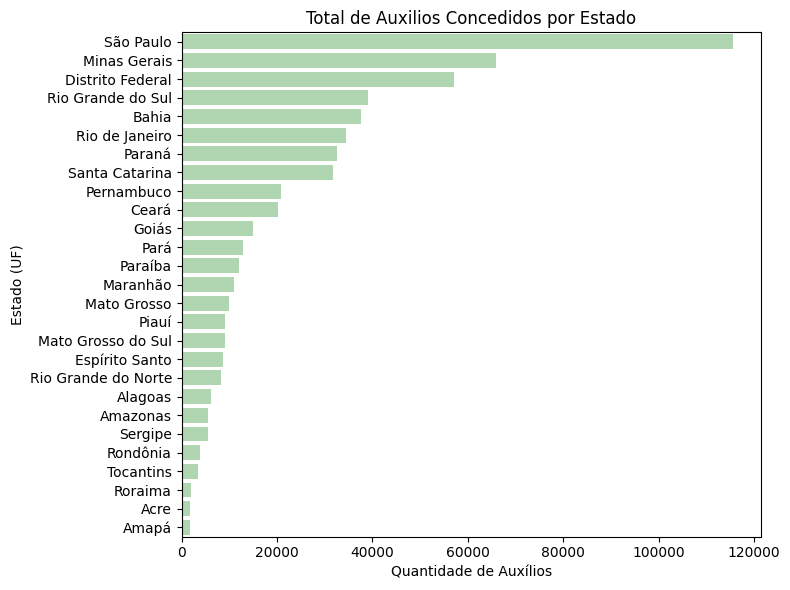

In [30]:
#Exibe o total de auxilios distribuidos no estado
plt.figure(figsize=(8,6))
sns.barplot(
    data=df_auxilios_por_UF,
    y='UF',
    x='Total de Auxilios Concedidos',
    color='#A8DCAB'
)
plt.title('Total de Auxilios Concedidos por Estado')
plt.xlabel('Quantidade de Auxílios')
plt.ylabel('Estado (UF)')
plt.tight_layout()
plt.show()

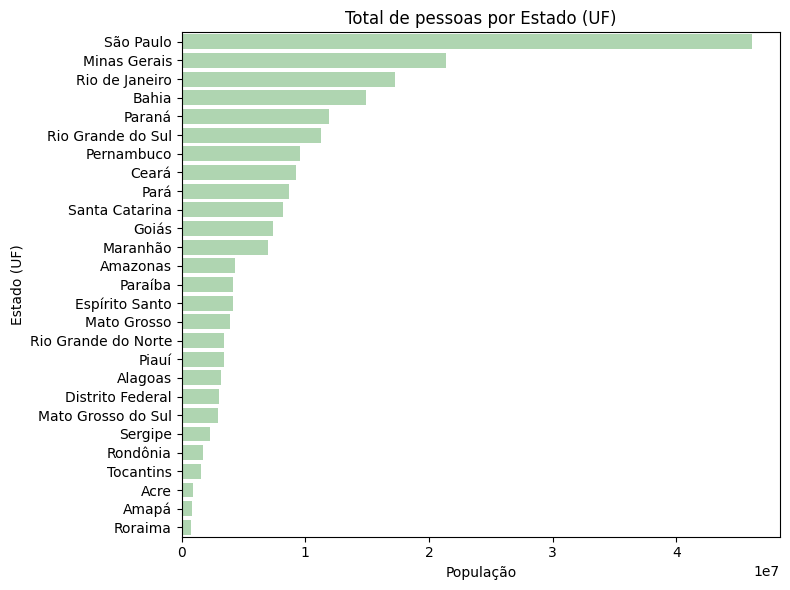

In [31]:
#Organiza o df em ordem decrescente
populacao = populacao.sort_values('População_residente', ascending=False)

#Exibe o total de pessoas por estado
plt.figure(figsize=(8,6))
sns.barplot(
    data=populacao,
    y='Unidade da Federação',
    x='População_residente',
    color='#A8DCAB'
)
plt.title('Total de pessoas por Estado (UF)')
plt.xlabel('População')
plt.ylabel('Estado (UF)')
plt.tight_layout()
plt.show()

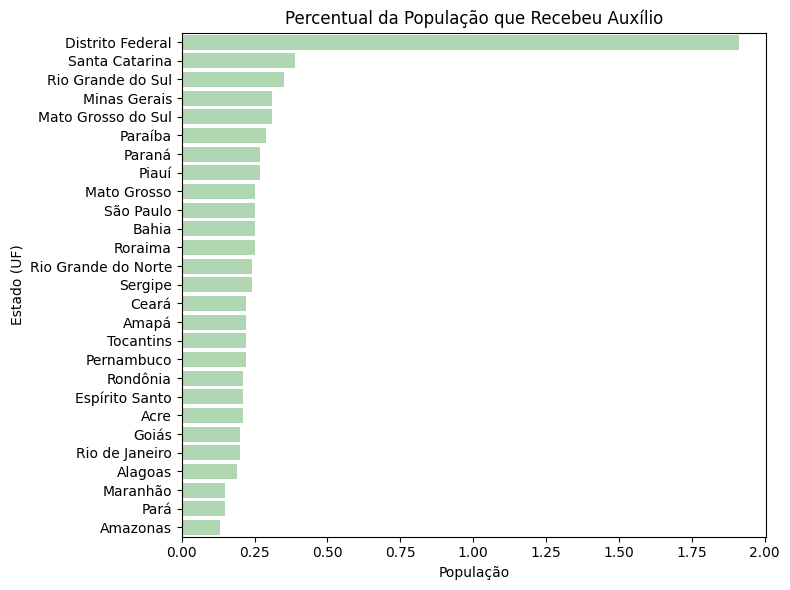

In [32]:
#Exibe o percentual de auxilios distribuidos comparado com a população
plt.figure(figsize=(8,6))
sns.barplot(
    data=comparacao,
    y='UF',
    x='porcentagem_auxilio',
    color='#A8DCAB',
)
plt.title('Percentual da População que Recebeu Auxílio')
plt.xlabel('População')
plt.ylabel('Estado (UF)')
plt.tight_layout()
plt.show()

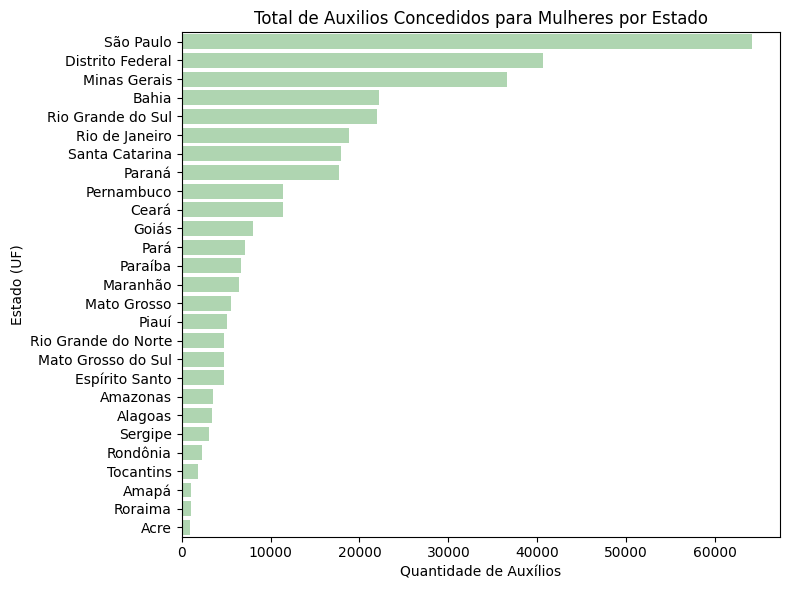

In [33]:
#Exibe o total de auxilios concedidos para mulheres
plt.figure(figsize=(8,6))
sns.barplot(
    data=df_mulheres_UF,
    y='UF',
    x='Total de Auxilios Concedidos',
    color='#A8DCAB'
)
plt.title('Total de Auxilios Concedidos para Mulheres por Estado')
plt.xlabel('Quantidade de Auxílios')
plt.ylabel('Estado (UF)')
plt.tight_layout()
plt.show()

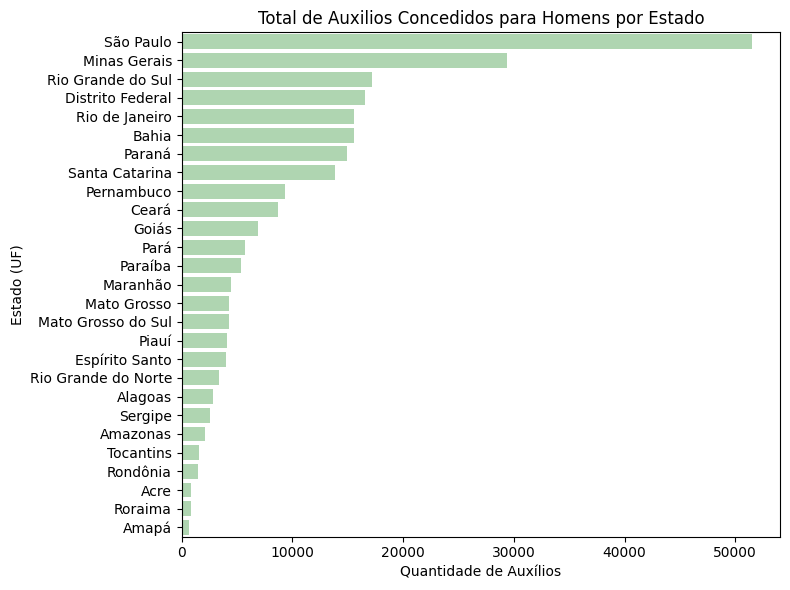

In [34]:
#Exibe o total de auxilios concidos para homens por estado
plt.figure(figsize=(8,6))
sns.barplot(
    data=df_homens_UF,
    y='UF',
    x='Total de Auxilios Concedidos',
    color='#A8DCAB'
)
plt.title('Total de Auxilios Concedidos para Homens por Estado')
plt.xlabel('Quantidade de Auxílios')
plt.ylabel('Estado (UF)')
plt.tight_layout()
plt.show()

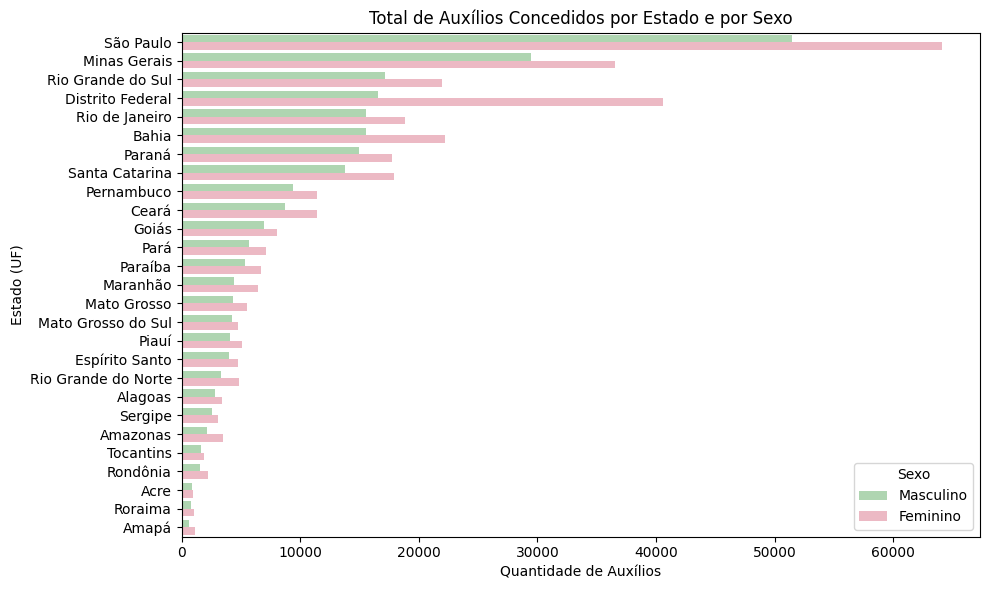

In [35]:
#Exibe a comparação de distribuição de auxilio por gênero
plt.figure(figsize=(10,6))
sns.barplot(
    data=df_generos_por_UF,
    y='UF',
    x='Total de Auxilios Concedidos',
    hue='Sexo',
    palette=['#A8DCAB', '#F5B0BF']
)
plt.title('Total de Auxílios Concedidos por Estado e por Sexo')
plt.xlabel('Quantidade de Auxílios')
plt.ylabel('Estado (UF)')
plt.legend(title='Sexo')
plt.tight_layout()
plt.show()

In [36]:
#TESTE - precisa ser melhorado
#Tipos de auxilios mais concedidos no estado de SP
df_SP = auxilios[auxilios['UF'] == 'São Paulo']
df_SP = df_SP['Tipos de auxilio'].value_counts().reset_index()
df_SP.columns = ['Tipo de auxilio', 'Total']
df_SP

,Tipo de auxilio,Total
0,Auxílio Doenca Previdenciário,78937
1,Aposentadoria por Idade,6772
2,Auxílio Salario Maternidade,6764
3,Pensão por Morte Previdenciária,6672
4,Auxílio Doenca por Acidente do Trabalho,6544
5,Aposentadoria por Tempo de Contribuição,3741
6,Aposentadoria Invalidez Previdenciária,2630
7,Amp. Social Pessoa Portadora Deficiencia,1249
8,Auxílio Acidente,842
9,Auxílio Acidente Previdenciário,553


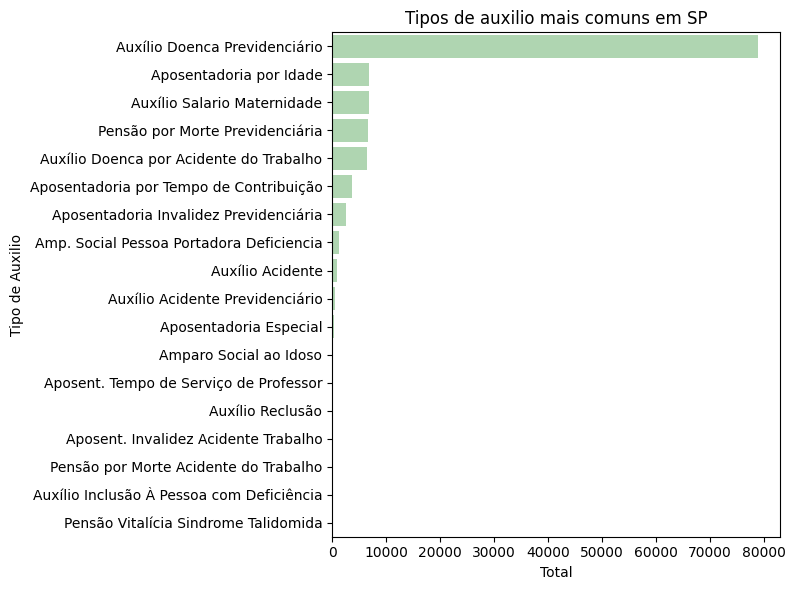

In [37]:
#Exibe os tipos de auxilio mais comuns no estado de sp
plt.figure(figsize=(8,6))
sns.barplot(
    data=df_SP,
    y='Tipo de auxilio',
    x='Total',
    color='#A8DCAB',
)
plt.title('Tipos de auxilio mais comuns em SP')
plt.xlabel('Total')
plt.ylabel('Tipo de Auxilio')
plt.tight_layout()
plt.show()

In [38]:
##mapa

## 2. ANÁLISE TEMPORAL

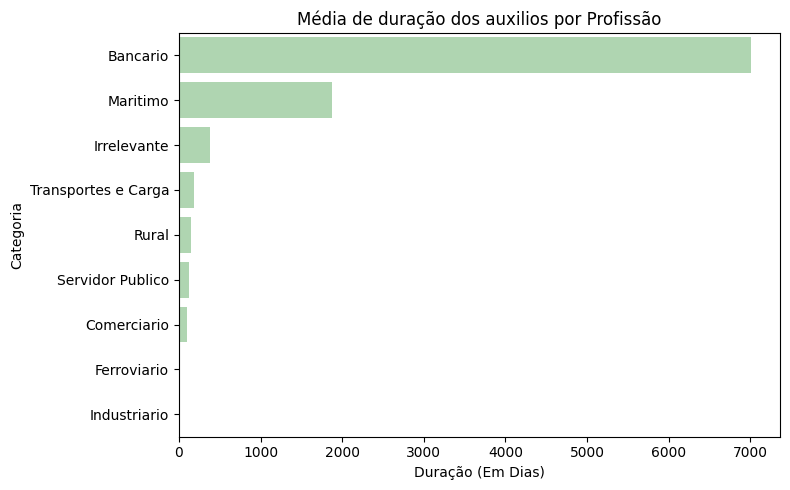

In [39]:
#Exibe Média de duração dos auxilios por Profissão
plt.figure(figsize=(8,5))
sns.barplot(
    data=df_media_profissao,
    y='Ramo Atividade',
    x='Duração',
    color='#A8DCAB',
)
plt.title('Média de duração dos auxilios por Profissão')
plt.xlabel('Duração (Em Dias)')
plt.ylabel('Categoria')
plt.tight_layout()
plt.show()

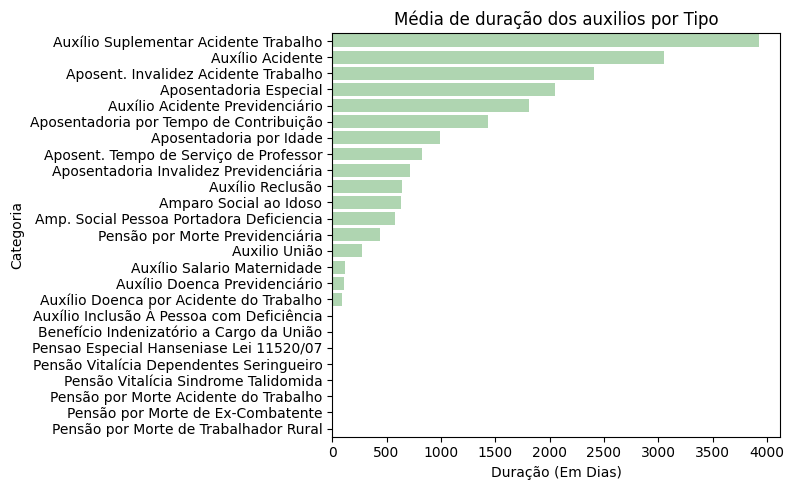

In [40]:
#Média de duração dos auxilios por Tipo
plt.figure(figsize=(8,5))
sns.barplot(
    data=df_media_categoria,
    y='Tipos de auxilio',
    x='Duração',
    color='#A8DCAB',
)
plt.title('Média de duração dos auxilios por Tipo')
plt.xlabel('Duração (Em Dias)')
plt.ylabel('Categoria')
plt.tight_layout()
plt.show()

C:\Users\sabrina.paes\AppData\Local\Temp\ipykernel_21840\2006402018.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


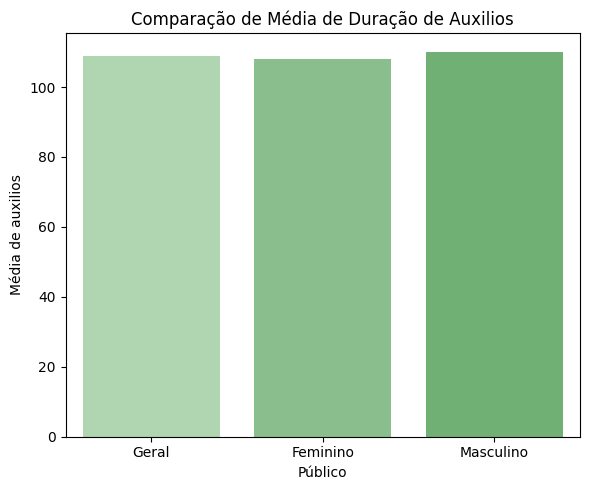

In [41]:
#Exibe comparação entre as médias
plt.figure(figsize=(6,5))
sns.barplot(
    data=juncao_medias,
    y='Média de Duração',
    x='Categoria',
    palette=['#A8DCAB', '#81C784', '#66BB6A']
)
plt.title('Comparação de Média de Duração de Auxilios')
plt.xlabel('Público')
plt.ylabel('Média de auxilios')
plt.tight_layout()
plt.show()

## 3. ANÁLISE DEMOGRAFICA

In [42]:
#Criando e calculando a coluna Idade
auxilios['Data nasc'] = pd.to_datetime(auxilios['Data nasc'])
auxilios['Idade'] = ((auxilios['Data DIB'] - auxilios['Data nasc']).dt.days / 365).round(0).astype('Int64')
auxilios

,Unnamed: 0,Tipos de auxilio,CID,Despacho,Data nasc,Sexo,Clientela,Vínculo dependentes,Forma Filiação,UF,Quant salarios minimos na RMI,Ramo Atividade,Pensão Alimenticia,Grau Instrução,Qt Anos Contribuição,Data DIB,Data DDB,Data DCB,Duração,Idade
0,0,Auxílio Doenca Previdenciário,D25.1 Leiomioma Intramural do Utero,Concessao com Analise Documental,1984-07-04,Feminino,Urbano,Não Informado,Empregado,Alagoas,1.50,Comerciario,Sem Pensâo Alimentícia,Não Informado,9,2025-10-11,2025-11-01,2025-10-25,14 days,41
1,1,Auxílio Doenca por Acidente do Trabalho,F33.1 Transt Depress Recorr Episodio Atual Mo,Concessao com Analise Documental,1990-09-01,Feminino,Urbano,Não Informado,Empregado,Alagoas,2.06,Comerciario,Sem Pensâo Alimentícia,Não Informado,11,2025-10-31,2025-11-01,2025-12-29,59 days,35
2,2,Auxílio Doenca Previdenciário,M23 Transt Internos dos Joelhos,Concessao com Analise Documental,1987-12-29,Feminino,Urbano,Não Informado,Empregado,Alagoas,1.00,Comerciario,Sem Pensâo Alimentícia,Não Informado,0,2025-10-30,2025-11-01,2025-12-13,44 days,38
3,3,Auxílio Doenca Previdenciário,S92 Frat do Pe,Concessao com Analise Documental,1987-05-05,Feminino,Urbano,Não Informado,Empregado,Alagoas,1.46,Comerciario,Sem Pensâo Alimentícia,Não Informado,11,2025-10-22,2025-11-01,2025-12-19,58 days,38
4,4,Auxílio Doenca Previdenciário,M51.1 Transt Disco Lombar Outr Intervert Radi,Concessao com Analise Documental,1991-03-08,Masculino,Urbano,Não Informado,Desempregado,Alagoas,1.00,Comerciario,Sem Pensâo Alimentícia,Não Informado,2,2025-10-23,2025-11-01,2025-12-21,59 days,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580798,584916,Auxílio Doenca Previdenciário,F41.2 Transt Misto Ansioso e Depressivo,Concessao com Analise Documental,1997-10-04,Feminino,Urbano,Não Informado,Desempregado,Tocantins,1.08,Comerciario,Sem Pensâo Alimentícia,Não Informado,2,2025-11-24,2025-11-29,2025-12-23,29 days,28
580799,584917,Auxílio Doenca Previdenciário,N80 Endometriose,Concessao com Analise Documental,1988-07-24,Feminino,Urbano,Não Informado,Empregado,Tocantins,1.00,Comerciario,Sem Pensâo Alimentícia,Não Informado,6,2025-11-19,2025-11-29,2026-01-02,44 days,37
580800,584918,Auxílio Doenca Previdenciário,G56.0 Sindr do Tunel do Carpo,Concessao com Analise Documental,1973-11-23,Feminino,Urbano,Não Informado,Autônomo,Tocantins,1.00,Comerciario,Sem Pensâo Alimentícia,Não Informado,11,2025-10-27,2025-11-29,2025-12-25,59 days,52
580801,584919,Amp. Social Pessoa Portadora Deficiencia,Zerados,Concessao Decorrente de Acao Judicial,1978-02-13,Masculino,Rural,Não Informado,Desempregado,Tocantins,1.00,Rural,Sem Pensâo Alimentícia,Não Informado,0,2024-08-13,2025-11-29,NaT,NaT,47


In [43]:
##fazer analisa utilizando idade

In [44]:
#Pergunta: O grau de instrução influencia o valor e a duração do benefício?
print(auxilios['Grau Instrução'].value_counts())

Grau Instrução
Não Informado                                    446403
5ª. a 8ª. Série Incompl. do 1º. Grau   (Ginás     41222
2º. Grau (Colegial) Completo                      32279
1º. Grau (Ginasial) Completo                      25260
2º. Grau (Colegial) Incompleto                    10374
Superior Completo                                  9694
Analfabeto                                         7263
Ate 4ª. Série 1º. Grau(Primário) Incompleta        3378
Superior Incompleto                                2835
4ª. Série 1ª. Grau Completa                        2095
Name: count, dtype: int64


In [45]:
#Calcula a média de salarios minimos para pessoas com baixa instrução
media_instrucao_baixa = df_instrucao_baixa['Quant salarios minimos na RMI'].mean()
print(f'Média de Quantidade de Salarios Minimos na RMI para pessoas com baixa instrução: {media_instrucao_baixa}')

Média de Quantidade de Salarios Minimos na RMI para pessoas com baixa instrução: 1.2068552814041078


In [46]:
#Calcula a média de salarios minimos para pessoas com alta instrução
media_instrucao_alta = df_instrucao_alta['Quant salarios minimos na RMI'].mean()
print(f'Média de Quantidade de Salarios Minimos na RMI para pessoas com alta instrução: {media_instrucao_alta}')

Média de Quantidade de Salarios Minimos na RMI para pessoas com alta instrução: 1.9716473780828478


C:\Users\sabrina.paes\AppData\Local\Temp\ipykernel_21840\3344849470.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


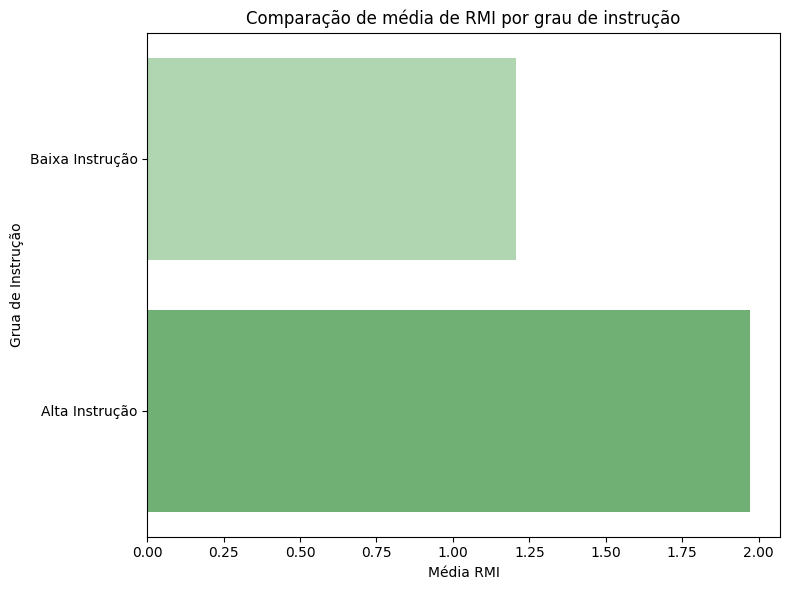

In [47]:
##grafico
df_media_rmi_instrucao = pd.DataFrame({
    'Nível de Instrução': ['Baixa Instrução', 'Alta Instrução'],
    'Média RMI': [media_instrucao_baixa, media_instrucao_alta]
})

plt.figure(figsize=(8,6))
sns.barplot(
    data=df_media_rmi_instrucao,
    y='Nível de Instrução',
    x='Média RMI',
    palette=['#A8DCAB', '#66BB6A']
)
plt.title('Comparação de média de RMI por grau de instrução')
plt.xlabel('Média RMI')
plt.ylabel('Grua de Instrução')
plt.tight_layout()
plt.show()

In [48]:
media_duracao_instrucao_baixa = df_instrucao_baixa['Duração'].mean()
media_duracao_instrucao_baixa = media_duracao_instrucao_baixa.days

print(f"Média de Duração do Auxilio para pessoas com baixa instrução: {media_duracao_instrucao_baixa} dias")

Média de Duração do Auxilio para pessoas com baixa instrução: 145 dias


In [60]:
media_duracao_instrucao_alta = df_instrucao_alta['Duração'].mean()
media_duracao_instrucao_alta = media_duracao_instrucao_alta.days

print(f"Média de Duração do Auxilio para pessoas com alta instrução: {media_duracao_instrucao_alta} dias")

Média de Duração do Auxilio para pessoas com alta instrução: 127 dias


C:\Users\sabrina.paes\AppData\Local\Temp\ipykernel_21840\948499085.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


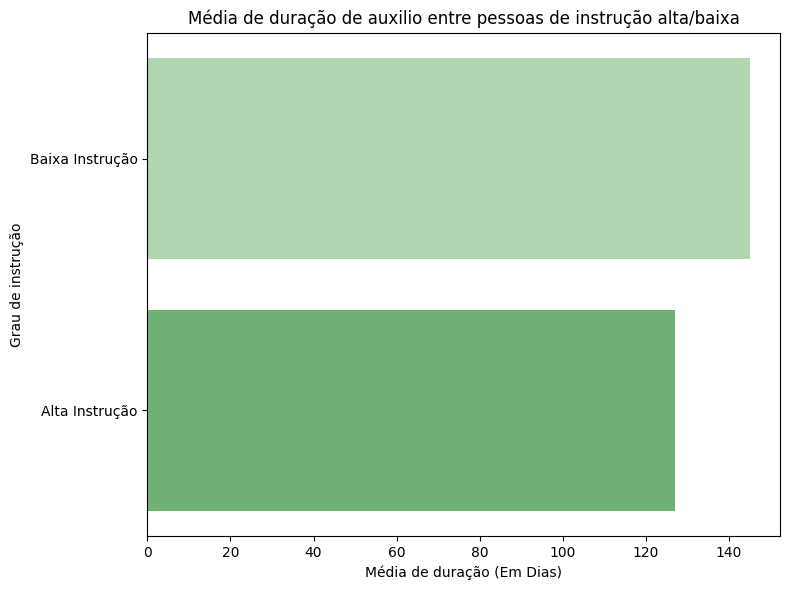

In [50]:
df_media_duracao_instrucao = pd.DataFrame({
    'Nível de Instrução': ['Baixa Instrução', 'Alta Instrução'],
    'Média Duração': [media_duracao_instrucao_baixa, media_duracao_instrucao_alta]
})
#grafico
plt.figure(figsize=(8,6))
sns.barplot(
    data=df_media_duracao_instrucao,
    y='Nível de Instrução',
    x='Média Duração',
    palette=['#A8DCAB','#66BB6A']
)
plt.title('Média de duração de auxilio entre pessoas de instrução alta/baixa')
plt.xlabel('Média de duração (Em Dias)')
plt.ylabel('Grau de instrução')
plt.tight_layout()
plt.show()

In [51]:
#Pessoas com dependentes recebem a mais?
print(auxilios['Vínculo dependentes'].value_counts())

Vínculo dependentes
Não Informado    490280
Filho             68125
Cônjuge           16403
Companheiro        5390
Ex-Cônjuge          229
Filho Adotivo       140
Pai/Mãe              85
Dep. Judicial        79
Designado            70
Irmão                 2
Name: count, dtype: int64


In [52]:
# Agrupar por vínculo de dependentes e calcular a média de RMI
media_rmi_dependentes = (
    auxilios.groupby('Vínculo dependentes')['Quant salarios minimos na RMI']
    .mean()
    .reset_index()
)
media_rmi_dependentes.columns = ['Vínculo dependentes', 'Média RMI']

print(media_rmi_dependentes)

  Vínculo dependentes  Média RMI
0          Companheiro   1.374831
1              Cônjuge   1.474678
2        Dep. Judicial   1.796709
3            Designado   3.596143
4           Ex-Cônjuge   3.096681
5                Filho   1.078885
6        Filho Adotivo   1.969929
7                Irmão   1.000000
8        Não Informado   1.292694
9              Pai/Mãe   1.312941


In [53]:
#Separa e cria df somente com quem possue dependentes
com_dependentes = {
    'Companheiro',
    'Cônjuge',
    'Dep. Judicial',
    'Designado',
    'Ex-Cônjuge',
    'Filho',
    'Filho Adotivo',
    'Irmão',
    'Pai/Mãe'
}
df_com_dependentes = auxilios[
    auxilios['Vínculo dependentes'].isin(com_dependentes)
]

In [61]:
#Cálcula a média de duração
media_duracao_com_dependentes = df_com_dependentes['Duração'].mean()
media_duracao_com_dependentes = media_duracao_com_dependentes.days

print(f"Média de Duração do Auxilio para pessoas com dependentes: {media_duracao_com_dependentes} dias")

Média de Duração do Auxilio para pessoas com dependentes: 121 dias


In [55]:
print(auxilios['Tipos de auxilio'].value_counts())

Tipos de auxilio
Auxílio Doenca Previdenciário                344738
Auxílio Salario Maternidade                   69061
Aposentadoria por Idade                       52823
Pensão por Morte Previdenciária               26736
Auxílio Doenca por Acidente do Trabalho       23001
Amp. Social Pessoa Portadora Deficiencia      21583
Aposentadoria Invalidez Previdenciária        19174
Aposentadoria por Tempo de Contribuição       11956
Auxílio Acidente Previdenciário                4296
Auxílio Acidente                               3149
Amparo Social ao Idoso                         1870
Aposentadoria Especial                          716
Aposent. Invalidez Acidente Trabalho            609
Aposent. Tempo de Serviço de Professor          472
Auxílio Reclusão                                422
Pensão por Morte Acidente do Trabalho            81
Auxílio Inclusão À Pessoa com Deficiência        51
Benefício Indenizatório a Cargo da União         38
Auxílio Suplementar Acidente Trabalho          

In [56]:
categorias_de_auxilios = {
    # AUXÍLIOS
    'Auxílios': [
        'Auxílio Doenca Previdenciário',
        'Auxílio Doenca por Acidente do Trabalho',
        'Auxílio Salario Maternidade',
        'Auxílio Acidente',
        'Auxílio Acidente Previdenciário',
        'Auxílio Reclusão',
        'Auxílio Suplementar Acidente Trabalho',
        'Auxílio Inclusão À Pessoa com Deficiência',
        'Auxilio União'
    ],
    
    # APOSENTADORIAS E AMPAROS
    'Aposentadorias e Amparos': [
        'Aposentadoria por Idade',
        'Aposentadoria por Tempo de Contribuição',
        'Aposentadoria Invalidez Previdenciária',
        'Aposent. Invalidez Acidente Trabalho',
        'Aposentadoria Especial',
        'Aposent. Tempo de Serviço de Professor',
        'Amparo Social ao Idoso',
        'Amp. Social Pessoa Portadora Deficiencia'
    ],
    
    # PENSÕES E BENEFÍCIOS ESPECIAIS
    'Pensões e Benefícios Especiais': [
        'Pensão por Morte Previdenciária',
        'Pensão por Morte Acidente do Trabalho',
        'Pensão por Morte de Ex-Combatente',
        'Pensão por Morte de Trabalhador Rural',
        'Benefício Indenizatório a Cargo da União',
        'Pensão Vitalícia Dependentes Seringueiro',
        'Pensão Vitalícia Sindrome Talidomida',
        'Pensao Especial Hanseniase Lei 11520/07'
    ]
}

## OUTROS

In [57]:
#contar ocorrências de cada combinação CID + Ramo
cid_ramo = auxilios.groupby(['Ramo Atividade', 'CID']).size().reset_index(name='Quantidade')

print(cid_ramo.head())

  Ramo Atividade                                           CID  Quantidade
0       Bancario                                       Zerados           8
1    Comerciario       016  Tuberculose Aparelho Geniturinario           1
2    Comerciario                                    020  Peste           1
3    Comerciario           047  Meningite Devida a Enterovirus           1
4    Comerciario  179  Neopl Malig do Utero Porcao nao Especif           1


In [58]:
#Calcula a média de salarios minimos para pessoas com alta instrução
media_instrucao_alta = df_instrucao_alta['Quant salarios minimos na RMI'].mean()
print(f'Média de Quantidade de Salarios Minimos na RMI para pessoas com alta instrução: {media_instrucao_alta}')

Média de Quantidade de Salarios Minimos na RMI para pessoas com alta instrução: 1.9716473780828478


In [59]:
#Pergunta: Qual a idade média de concessão por tipo de auxílio?

agrupamento_tipo = auxilios.groupby('Tipos de auxilio')['Idade'].mean().round(0).astype('Int64').reset_index(name='media de idade')
agrupamento_tipo

,Tipos de auxilio,media de idade
0,Amp. Social Pessoa Portadora Deficiencia,27
1,Amparo Social ao Idoso,66
2,Aposent. Invalidez Acidente Trabalho,49
3,Aposent. Tempo de Serviço de Professor,56
4,Aposentadoria Especial,49
5,Aposentadoria Invalidez Previdenciária,54
6,Aposentadoria por Idade,62
7,Aposentadoria por Tempo de Contribuição,57
8,Auxilio União,37
9,Auxílio Acidente,38
